In [1]:
import torch
import matplotlib.pyplot as plt

In [18]:
#读取数据
namelist=["resblock_128conv_withupdown_500epoch",
          "resblock_128conv_withupdown_500epoch_with_batchnorm"]
PSNR_list=[]
SSIM_list=[]
loss_train_list=[]
loss_val_list=[]
for str in namelist:
    PSNR_name=[f".\\data\\problem4\\{str}_PSNR.pth"]#shape:n
    SSIM_name=[f".\\data\\problem4\\{str}_SSIM.pth"]#shape:n
    loss_train_name=[f".\\data\\problem4\\{str}_loss_train.pth"]#shape:n
    loss_val_name=[f".\\data\\problem4\\{str}_loss_val.pth"]#shape:n
    for name in PSNR_name:
        PSNR_list.append(torch.load(name))
    for name in SSIM_name:
        SSIM_list.append(torch.load(name))
    for name in loss_train_name:
        loss_train_list.append(torch.load(name))
    for name in loss_val_name:
        loss_val_list.append(torch.load(name))

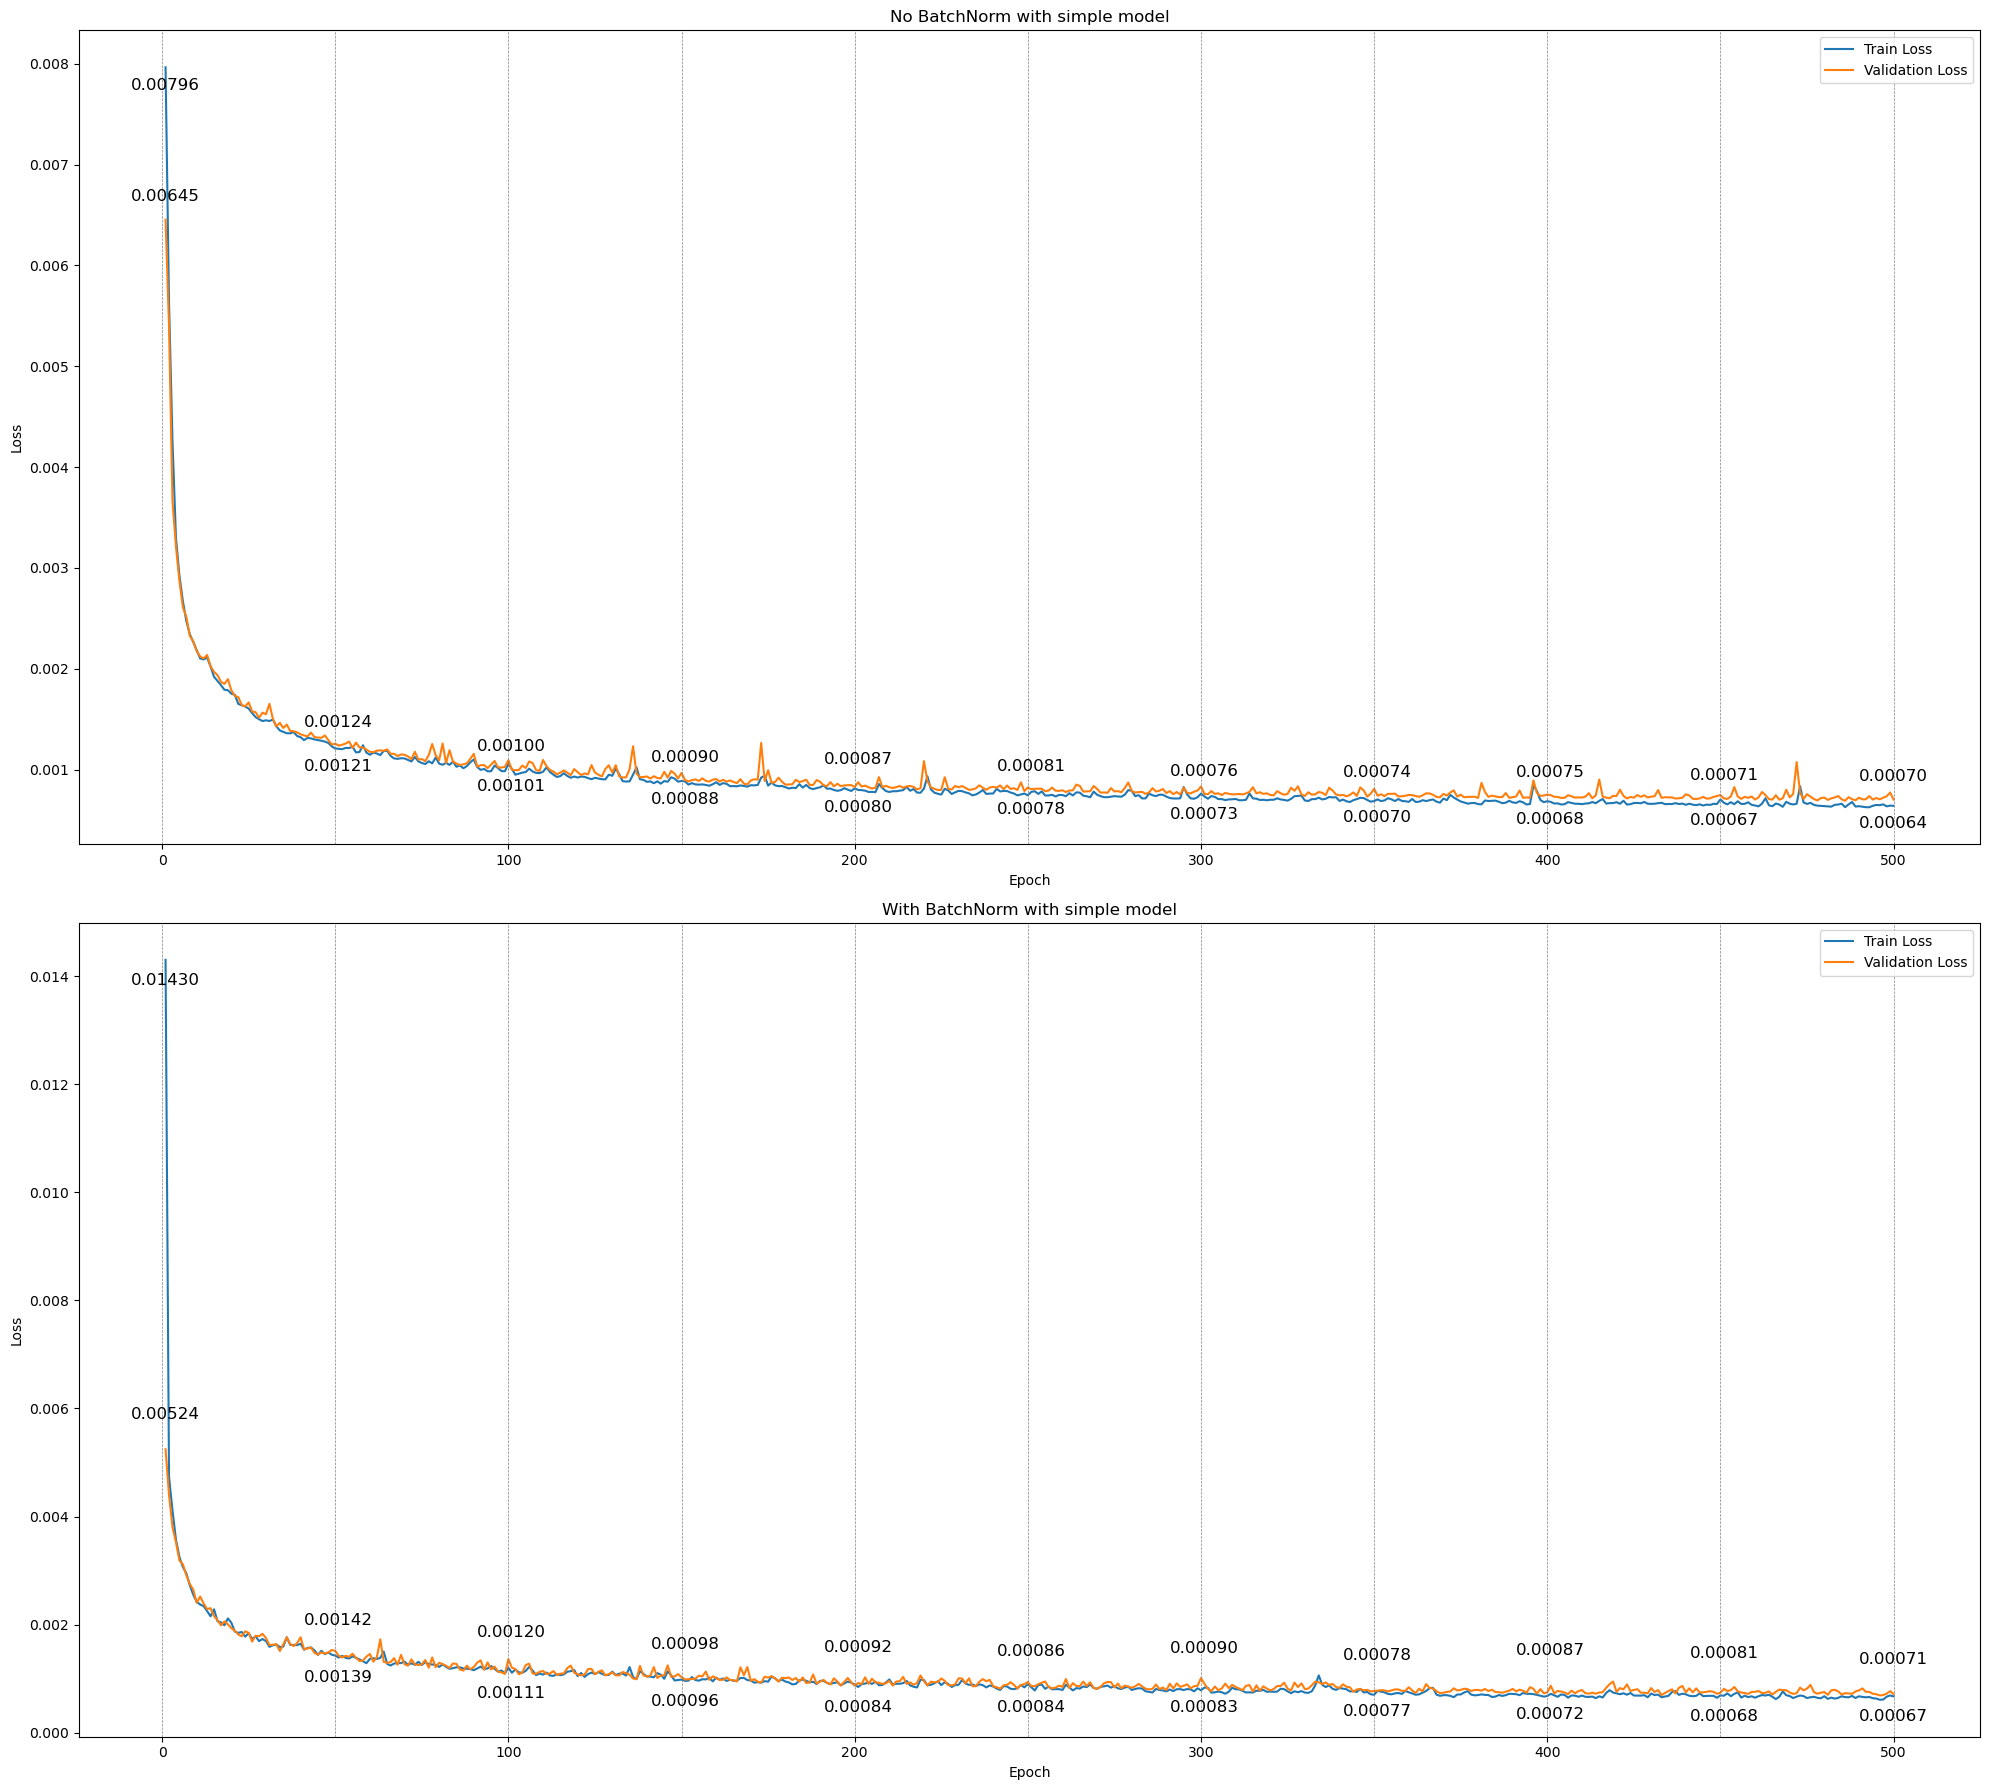

In [24]:
import matplotlib.pyplot as plt
import numpy as np
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(20, 18))

# 给每个子图绘制训练损失和验证损失
for i, ax in enumerate(axes):
    x_ticks = range(1, len(loss_train_list[i]) + 1)
    
    # 绘制训练损失和验证损失
    ax.plot(x_ticks, loss_train_list[i], label='Train Loss')
    ax.plot(x_ticks, loss_val_list[i], label='Validation Loss')
    
    # 每50个epoch画一条虚线
    for j in range(1, len(loss_train_list[i]) + 2, 50):
        ax.axvline(x=j-1, color='gray', linestyle='--', linewidth=0.5)
    
    # 显示数据
    for k in range(0, len(loss_train_list[i])):
        if (k) % 50 == 0 or k == len(loss_train_list[i]) - 1 or k == 0:
            if i==1:
                ax.text(x_ticks[k], loss_train_list[i][k]-0.0005151, f'{loss_train_list[i][k]:.5f}', ha='center', va='bottom', fontsize=12)
                ax.text(x_ticks[k], loss_val_list[i][k]+0.00051, f'{loss_val_list[i][k]:.5f}', ha='center', va='bottom', fontsize=12)
                continue
            ax.text(x_ticks[k], loss_train_list[i][k]-0.000251, f'{loss_train_list[i][k]:.5f}', ha='center', va='bottom', fontsize=12)
            ax.text(x_ticks[k], loss_val_list[i][k]+0.000151, f'{loss_val_list[i][k]:.5f}', ha='center', va='bottom', fontsize=12)
    
    ax.set_xlabel('Epoch')
    ax.set_ylabel('Loss')
    ax.legend()
axes[0].set_title('No BatchNorm with complex model')
axes[1].set_title('With BatchNorm with complex model')
plt.tight_layout()
plt.show()
